In [19]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
from Class import taux_remplissage
from sklearn import decomposition
from functions_pca import *
from sklearn import preprocessing
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [20]:
tickets = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
tickets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,genuine
46,True,171.85,103.90,103.74,4.13,3.07,113.15,1
71,True,172.17,103.93,103.62,4.06,3.08,113.10,1


Pour effectuer l'apprentissage nous devons transfomer les valeurs bouléennes en numéro 

In [21]:
tickets['genuine'] = tickets['is_genuine'] * 1
tickets['genuine'].astype(int)

## 1 = vrais billet et  0 faux billet
tickets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,genuine
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.67,103.74,103.70,4.01,2.87,113.29,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,1


In [22]:
data = tickets.copy()
data = data.drop('is_genuine', axis='columns')
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412,0.588235
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448,0.493607
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000,0.000000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000,0.000000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000,1.000000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500,1.000000
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000,1.000000


La librairy de sckitlearn permet d'entrainer notre dataset à déterminer si un billet vrai/faux
en prenants en compte tout les variables.

In [23]:
# séparation des donnée de test et des données d'entrainement

xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['genuine'], axis='columns'),
                                                data['genuine'], train_size=0.20)

Ci-dessus nous entrainons 80% du dataset pour la reconnaissance de billet et 20% qui seront les test 

In [24]:
# nous allons faire une regression logistique 
regressionLogistic = LogisticRegression(random_state=0,solver='liblinear')
regressionLogistic.fit(xtrain,ytrain)

LogisticRegression(random_state=0, solver='liblinear')

In [25]:
# sauvegarde du model afin qu'on puisse le réutiliser afin de detecter d'auttres billet
with open('../../lab/Python_traitement/modelLR.pkl', 'wb') as f:
    myModelLR = pickle.Pickler(f)
    myModelLR.dump(regressionLogistic)

In [29]:
regressionLogistic.score(xtest,ytest)

0.9705882352941176

La RL à été apprise a plus de. 98%

## MATRICE DE CONFUSION

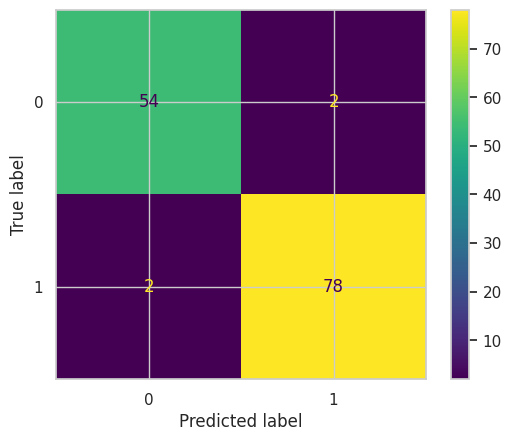

In [28]:


# prediction de Y classi
ypred = regressionLogistic.predict(xtest)
confusionOfMatrice = confusion_matrix(ytest,ypred)
matricePlot = ConfusionMatrixDisplay(confusion_matrix=confusionOfMatrice)
matricePlot.plot() 

In [31]:
print(ypred)

[1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
